# Exploratory Data Analysis - KPO

## Imports

In [3]:
import re
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns

## Data load

In [5]:
# Load and parse the KML
file_path = "HoReCa.kml"
tree = ET.parse(file_path)
root = tree.getroot()

# Namespace for KML
ns = {'kml': 'http://www.opengis.net/kml/2.2'}

## Data unpack

In [7]:
investments = []

for placemark in root.findall(".//kml:Placemark", ns):
    data_entry = {
        "Nazwa przedsięwzięcia": None,
        "Nazwa": None,
        "Miejsce Realizacji Województwo": None,
        "Grantobiorca Miejscowość": None,
        "Grantobiorca Ulica": None,
        "Grantobiorca Nr budynku": None,
        "Grantobiorca Kod pocztowy": None,
        "Wartość wsparcia": None
    }
    
    # Get "Nazwa przedsięwzięcia" from <name> tag
    name_tag = placemark.find("kml:name", ns)
    if name_tag is not None:
        data_entry["Nazwa przedsięwzięcia"] = name_tag.text.strip()
    
    # Get description text
    desc_tag = placemark.find("kml:description", ns)
    if desc_tag is not None and desc_tag.text:
        desc_text = desc_tag.text
        
        # Replace <br> with newlines
        desc_text = re.sub(r"<br\s*/?>", "\n", desc_text)
        # Remove other HTML tags
        desc_text = re.sub(r"<.*?>", "", desc_text)
        
        for line in desc_text.splitlines():
            line = line.strip()
            if ": " in line:
                key, value = line.split(": ", 1)
                key = key.strip()
                value = value.strip()
                if key in data_entry:
                    data_entry[key] = value
    
    investments.append(data_entry)
    df = pd.DataFrame(investments)

## Data understanding

In [9]:
df.head()

,Nazwa przedsięwzięcia,Nazwa,Miejsce Realizacji Województwo,Grantobiorca Miejscowość,Grantobiorca Ulica,Grantobiorca Nr budynku,Grantobiorca Kod pocztowy,Wartość wsparcia
0,"Wdrożenie w działalności Wnioskodawcy nowej, n...",CLEOPATRA PREMIUM SPÓŁKA Z OGRANICZONĄ ODPOWIE...,Łódzkie,Lublin,Trześniowska,63,20-227,469807.87
1,Wzmocnienie odporności firmy OZDOBA I SYN S.C....,OZDOBA I SYN S.C.,ŁÓDZKIE,Łódź,None,8,94-302,292095
2,Wzmocnienie odporności Restauracji Pod Czaplą ...,Restauracja Pod Czaplą Dobrowolscy spółka cywilna,ŚLĄSKIE,Bytom,Stanisława Moniuszki,8,41-902,305690.6
3,Inwestycja spółki WIOLETTA I MICHAŁ LISZOWSCY ...,WIOLETTA I MICHAŁ LISZOWSCY SPÓŁKA CYWILNA,ŚLĄSKIE,Żory,Józefa Mikołajca,17,44-240,113032.23
4,Projekt ZIELONA OLIWKA: Rewolucja w gastronomi...,"PRZEDSIĘBIORSTWO USŁUGOWO-HANDLOWE ""IWO"" IWONA...",ŚLĄSKIE,Zabrze,Jagiellońska,38,41-800,416997.9


Można zwrócić uwagę na uppercase w województwach, na pewno trzeba będzie się tym zająć

In [11]:
df.sample(10)

,Nazwa przedsięwzięcia,Nazwa,Miejsce Realizacji Województwo,Grantobiorca Miejscowość,Grantobiorca Ulica,Grantobiorca Nr budynku,Grantobiorca Kod pocztowy,Wartość wsparcia
250,Dywersyfikacja działalności drogą do rozwoju T...,Pracownia Tortów Artystycznych Katarzyna Brzezina,ŚLĄSKIE,Katowice,Graniczna,11,40-017,60044.4
2105,Dywersyfikacja działalności firmy ST Sp. z o....,ST SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,LUBELSKIE,Lublin,Zuchów,2,20-047,404717
567,Dywersyfikacja działalności firmy cateringowej...,Zbigniew Kwiatkowski Katering i Gastronomia,WIELKOPOLSKIE,Dąbie,11 Listopada 1918 Roku,40,62-660,129000.65
2085,"Wzmocnienie Firmy Usługi Gastronomiczne ""DIANA...","Usługi Gastronomiczne "" DIANA"" Mirosława Ładniak",LUBELSKIE,Porosiuki,None,73C,21-500,387166.69
2588,Inwestycja na terenie województwa Mazowieckieg...,ZJEDZ SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,MAZOWIECKIE,Warszawa,Nowogrodzka,10,00-511,488545.57
2237,"Wzmocnienie odporności na kryzysy firmy ""PROJE...","""PROJEKT 3P PAWLIK S., POCHWAŁA M., POPIEL J. ...",ŚWIĘTOKRZYSKIE,Kielce,Świętego Leonarda,15,25-311,234532.7
1990,"""Wdrożenie Innowacyjnej usługi pobytu E-Gość: ...","HOTEL DUET SPÓŁKA CYWILNA ALICJABRZOZOWSKA, BA...",LUBELSKIE,Lublin,Milenijna,5,20-884,137468.08
460,Region 4. Nowy wizerunek firmy Gospoda pod Brz...,Halina Tybura Gospoda pod Brzozami,ŁÓDZKIE,Uniejów,Dąbska,26,99-210,181786.9
2768,Rozszerzenie działalności przedsiębiorcy MAREK...,MAREK MICHNIEWICZ NIEPUBLICZNY ZAKŁAD OPIEKI Z...,WARMIŃSKO-MAZURSKIE,Spychowo,Mazurska,22,12-150,528190.25
1345,Dywersyfikacja prowadzonej działalności poprze...,"USŁUGI OGÓLNOBUDOWLANE ""KELLER"" KELLER WITOLD",POMORSKIE,Załakowo,None,18,83-340,537177.13


In [12]:
df.shape

(2889, 8)

In [13]:
df.columns

Index(['Nazwa przedsięwzięcia', 'Nazwa', 'Miejsce Realizacji Województwo',
       'Grantobiorca Miejscowość', 'Grantobiorca Ulica',
       'Grantobiorca Nr budynku', 'Grantobiorca Kod pocztowy',
       'Wartość wsparcia'],
      dtype='object')

Nazwy kolumn zostaną ujednolicone

In [15]:
df.describe()

,Nazwa przedsięwzięcia,Nazwa,Miejsce Realizacji Województwo,Grantobiorca Miejscowość,Grantobiorca Ulica,Grantobiorca Nr budynku,Grantobiorca Kod pocztowy,Wartość wsparcia
count,2889,2889,2889,2889,2504,2889,2889,2889
unique,2882,2885,30,1090,1418,572,1841,2599
top,Rozszerzenie działalności firmy poprzez wdroże...,APM PARTNERS SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIAL...,MAZOWIECKIE,Warszawa,Tadeusza Kościuszki,1,43-300,540000
freq,2,2,409,243,36,160,25,156


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Nazwa przedsięwzięcia           2889 non-null   object
 1   Nazwa                           2889 non-null   object
 2   Miejsce Realizacji Województwo  2889 non-null   object
 3   Grantobiorca Miejscowość        2889 non-null   object
 4   Grantobiorca Ulica              2504 non-null   object
 5   Grantobiorca Nr budynku         2889 non-null   object
 6   Grantobiorca Kod pocztowy       2889 non-null   object
 7   Wartość wsparcia                2889 non-null   object
dtypes: object(8)
memory usage: 180.7+ KB


## Data preparation

### Datatypes check & fix

In [19]:
df.dtypes

Nazwa przedsięwzięcia             object
Nazwa                             object
Miejsce Realizacji Województwo    object
Grantobiorca Miejscowość          object
Grantobiorca Ulica                object
Grantobiorca Nr budynku           object
Grantobiorca Kod pocztowy         object
Wartość wsparcia                  object
dtype: object

Na pewno wartość wsparcia będzie mogła stać się liczbą

In [21]:
df["Wartość wsparcia"] = pd.to_numeric(df["Wartość wsparcia"], errors="coerce")

In [22]:
df.dtypes

Nazwa przedsięwzięcia              object
Nazwa                              object
Miejsce Realizacji Województwo     object
Grantobiorca Miejscowość           object
Grantobiorca Ulica                 object
Grantobiorca Nr budynku            object
Grantobiorca Kod pocztowy          object
Wartość wsparcia                  float64
dtype: object

Wygląda dobrze!

### Column names

In [25]:
df.rename(columns={'Nazwa przedsięwzięcia':'Investment', 
                   'Nazwa':'Name', 
                   'Miejsce Realizacji Województwo':'Voivodeship', 
                   'Grantobiorca Miejscowość':'City', 
                   'Grantobiorca Ulica':'Street',
                   'Grantobiorca Nr budynku':'Building',
                   'Grantobiorca Kod pocztowy':'Postal',
                    'Wartość wsparcia':'Money'},
                    inplace=True)

Nazwy kolumn zostały zmienione na bardziej "przyjazne"

In [27]:
df.head()

,Investment,Name,Voivodeship,City,Street,Building,Postal,Money
0,"Wdrożenie w działalności Wnioskodawcy nowej, n...",CLEOPATRA PREMIUM SPÓŁKA Z OGRANICZONĄ ODPOWIE...,Łódzkie,Lublin,Trześniowska,63,20-227,469807.87
1,Wzmocnienie odporności firmy OZDOBA I SYN S.C....,OZDOBA I SYN S.C.,ŁÓDZKIE,Łódź,None,8,94-302,292095.00
2,Wzmocnienie odporności Restauracji Pod Czaplą ...,Restauracja Pod Czaplą Dobrowolscy spółka cywilna,ŚLĄSKIE,Bytom,Stanisława Moniuszki,8,41-902,305690.60
3,Inwestycja spółki WIOLETTA I MICHAŁ LISZOWSCY ...,WIOLETTA I MICHAŁ LISZOWSCY SPÓŁKA CYWILNA,ŚLĄSKIE,Żory,Józefa Mikołajca,17,44-240,113032.23
4,Projekt ZIELONA OLIWKA: Rewolucja w gastronomi...,"PRZEDSIĘBIORSTWO USŁUGOWO-HANDLOWE ""IWO"" IWONA...",ŚLĄSKIE,Zabrze,Jagiellońska,38,41-800,416997.90


### Handling duplicates

In [29]:
df.loc[df.duplicated()]

,Investment,Name,Voivodeship,City,Street,Building,Postal,Money
224,Rozszerzenie działalności firmy poprzez wdroże...,APM PARTNERS SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIAL...,ŁÓDZKIE,Łódź,Targowa,35,90-043,135702.85
2000,Zwiększenie odporności przedsiębiorstwa na syt...,Aneta Bednarska,ŚWIĘTOKRZYSKIE,Solec-Zdrój,1 Maja,1,28-131,229529.19
2001,Zwiększenie odporności i rozszerzenie działaln...,"""VON HAGEN POLSKA"" SPÓŁKA Z OGRANICZONĄ ODPOWI...",ŚWIĘTOKRZYSKIE,Kielce,Klonowa,55,25-553,419400.45


In [30]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [31]:
df.loc[df.duplicated()]

,Investment,Name,Voivodeship,City,Street,Building,Postal,Money


3 znalezione duplikaty zostały usunięte

### Handling missing values

In [34]:
df.isna().sum().sort_values(ascending=False)

Street         385
Investment       0
Name             0
Voivodeship      0
City             0
Building         0
Postal           0
Money            0
dtype: int64

Mamy 385 pustych wartości dla ulicy. Spójrzmy na heatmapę:

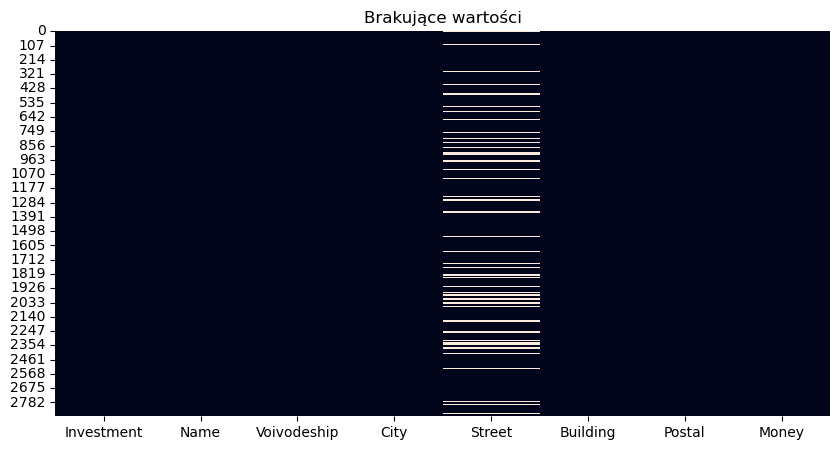

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Brakujące wartości")
plt.show()

### Check of real data

In [38]:
df['Voivodeship'].value_counts()

Voivodeship
MAZOWIECKIE            409
POMORSKIE              310
ŚLĄSKIE                286
MAŁOPOLSKIE            278
WIELKOPOLSKIE          233
DOLNOŚLĄSKIE           231
ZACHODNIOPOMORSKIE     228
KUJAWSKO-POMORSKIE     123
ŁÓDZKIE                121
PODKARPACKIE           107
WARMIŃSKO-MAZURSKIE    107
LUBELSKIE               92
LUBUSKIE                68
OPOLSKIE                67
ŚWIĘTOKRZYSKIE          64
PODLASKIE               59
Śląskie                 36
Zachodniopomorskie      13
Łódzkie                 12
Pomorskie                9
Dolnośląskie             8
Opolskie                 8
Małopolskie              5
Kujawsko-pomorskie       3
Wielkopolskie            3
Podkarpackie             2
Świętokrzyskie           1
Śląśkie                  1
Warmińsko-Mazurskie      1
Podlaskie                1
Name: count, dtype: int64

Niektóre województwa pojawiają się podwójnie (wielkimi i małymi literami)

In [40]:
df['Voivodeship'] = df['Voivodeship'].str.capitalize()

In [41]:
df['Voivodeship'].value_counts()

Voivodeship
Mazowieckie            409
Śląskie                322
Pomorskie              319
Małopolskie            283
Zachodniopomorskie     241
Dolnośląskie           239
Wielkopolskie          236
Łódzkie                133
Kujawsko-pomorskie     126
Podkarpackie           109
Warmińsko-mazurskie    108
Lubelskie               92
Opolskie                75
Lubuskie                68
Świętokrzyskie          65
Podlaskie               60
Śląśkie                  1
Name: count, dtype: int64

Zostało to naprawione. Ale uwagę przykuwa województwo "Śląśkie", co prawdopodobnie było błędem przy wprowadzaniu do bazy

In [43]:
df.loc[df['Voivodeship']=='Śląśkie']

,Investment,Name,Voivodeship,City,Street,Building,Postal,Money
316,Rozszerzenie działalności firmy Biuro Handlowo...,"Biuro Handlowo-Usługowe ""Strażnica"" Wiesław Biel",Śląśkie,Żywiec,Kościuszki,29,34-300,540000.0


In [44]:
df['Voivodeship'] = df['Voivodeship'].replace('Śląśkie', 'Śląskie')
# df.loc[df['Voivodeship'] == 'Śląśkie', 'Voivodeship'] = 'Śląskie'

In [45]:
df.loc[df['Voivodeship']=='Śląśkie']

,Investment,Name,Voivodeship,City,Street,Building,Postal,Money


In [46]:
df['Voivodeship'].value_counts()

Voivodeship
Mazowieckie            409
Śląskie                323
Pomorskie              319
Małopolskie            283
Zachodniopomorskie     241
Dolnośląskie           239
Wielkopolskie          236
Łódzkie                133
Kujawsko-pomorskie     126
Podkarpackie           109
Warmińsko-mazurskie    108
Lubelskie               92
Opolskie                75
Lubuskie                68
Świętokrzyskie          65
Podlaskie               60
Name: count, dtype: int64

Teraz wygląda to dobrze. Sprawdźmy czy liczba województw się zgadza:

In [48]:
len(df['Voivodeship'].value_counts())

16

A tutaj z ciekawości rozkład miast:

In [50]:
df['City'].value_counts().head(30)

City
Warszawa         243
Kraków           133
Wrocław           90
Gdańsk            89
Poznań            79
Szczecin          76
Łódź              60
Gdynia            42
Lublin            39
Katowice          36
Bydgoszcz         36
Bielsko-Biała     27
Rzeszów           24
Białystok         22
Opole             22
Toruń             22
Olsztyn           22
Zielona Góra      21
Sopot             20
Kielce            18
Zakopane          17
Częstochowa       15
Wisła             14
Kołobrzeg         14
Gliwice           13
Radom             12
Koszalin          10
Kalisz            10
Nowy Sącz         10
Ruda Śląska       10
Name: count, dtype: int64

## Data visualization

### Count per voivodeship - top 10

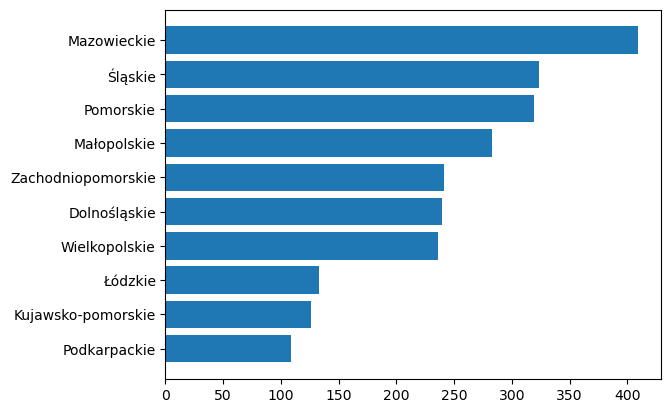

In [53]:
count_voivodeship = df['Voivodeship'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

ax.barh(count_voivodeship[6:].index, count_voivodeship[6:].values)

plt.show()

### Money per voivodeship - top 10

In [55]:
money_voivodeship = df.groupby('Voivodeship')['Money'].agg('sum').sort_values(ascending=False)

In [56]:
money_voivodeship

Voivodeship
Mazowieckie            1.775111e+08
Pomorskie              1.332944e+08
Śląskie                1.330422e+08
Małopolskie            1.097289e+08
Zachodniopomorskie     1.016866e+08
Dolnośląskie           9.857265e+07
Wielkopolskie          9.731478e+07
Łódzkie                5.418184e+07
Kujawsko-pomorskie     5.217719e+07
Warmińsko-mazurskie    4.667646e+07
Podkarpackie           4.094274e+07
Lubelskie              3.625823e+07
Opolskie               3.318503e+07
Lubuskie               2.848973e+07
Podlaskie              2.509588e+07
Świętokrzyskie         2.311049e+07
Name: Money, dtype: float64

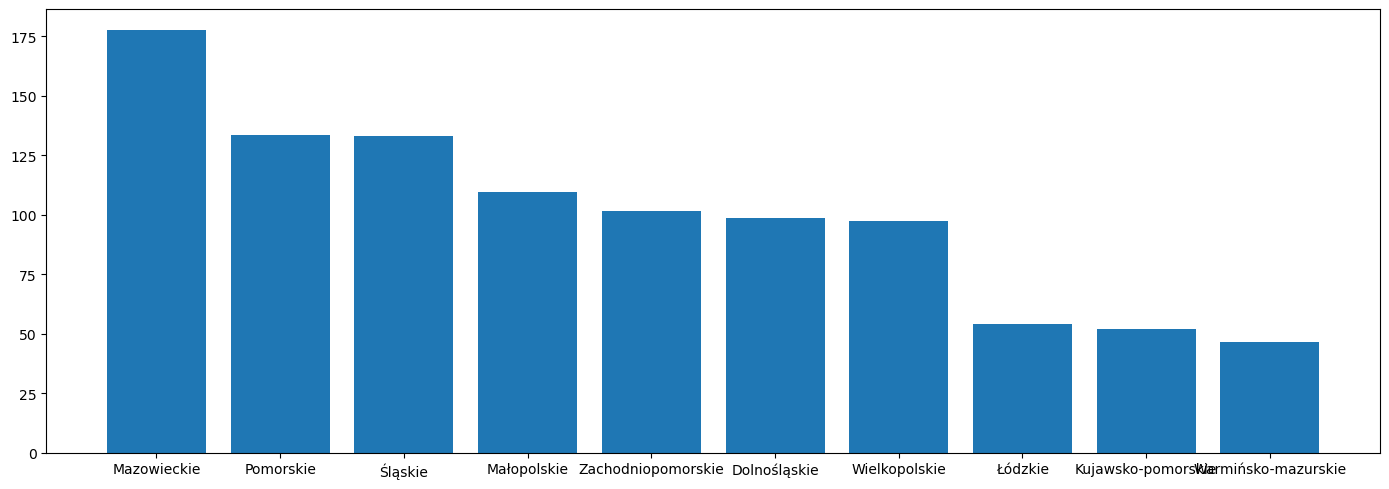

In [57]:
fig, ax = plt.subplots(figsize=(14,5))

ax.bar(money_voivodeship[:10].index, money_voivodeship[:10].values/1e6)

plt.tight_layout()
plt.show()


### Share count per voivodeship

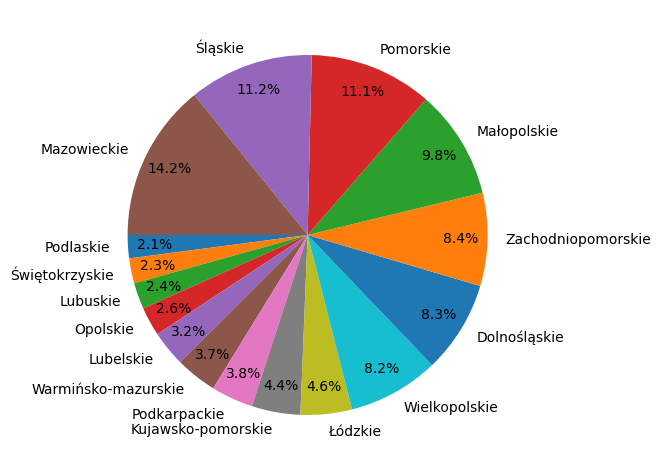

In [59]:
fig, ax = plt.subplots()

ax.pie(count_voivodeship,
      labels=count_voivodeship.index,
      startangle=180,
      autopct='%1.1f%%',
      pctdistance=0.85,
      labeldistance=1.1)

plt.tight_layout()
plt.show()

### Share money per voivodeship

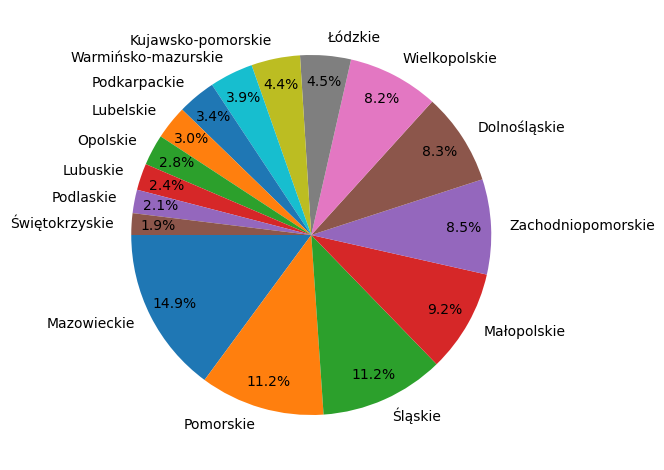

In [61]:
fig, ax = plt.subplots()

ax.pie(money_voivodeship,
      labels=money_voivodeship.index,
      startangle=180,
      autopct='%1.1f%%',
      pctdistance=0.85,
      labeldistance=1.1)

plt.tight_layout()
plt.show()

### Count per city - top 10

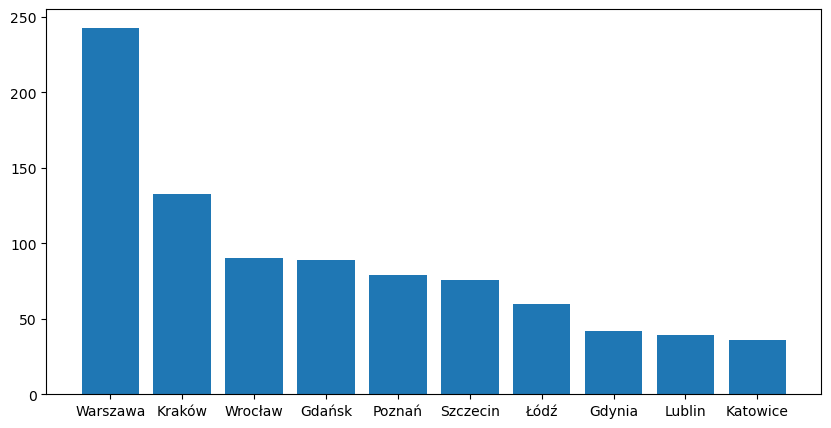

In [63]:
count_city = df['City'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(count_city[:10].index, count_city[:10].values)

plt.show()

### Money per city - top 10

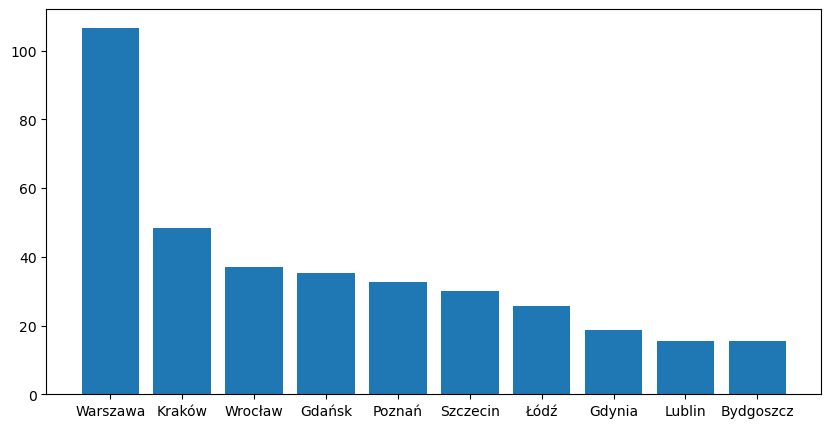

In [65]:
money_city = df.groupby('City')['Money'].agg('sum').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(money_city[:10].index, money_city[:10].values/1e6)

plt.show()

### Histogram

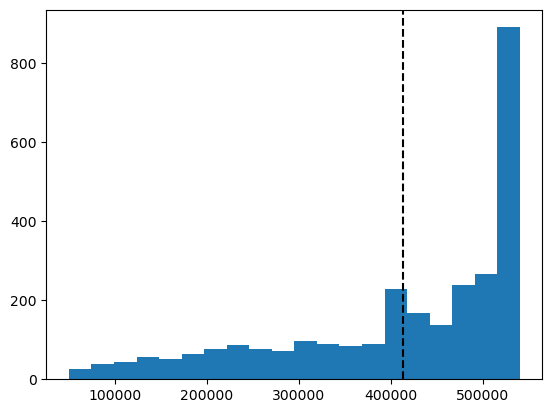

In [67]:
fig, ax = plt.subplots()

ax.hist(df['Money'],
       bins = 20)
ax.axvline(df['Money'].mean(), color='k', linestyle='dashed', linewidth=1.5)


plt.show()

<Axes: >

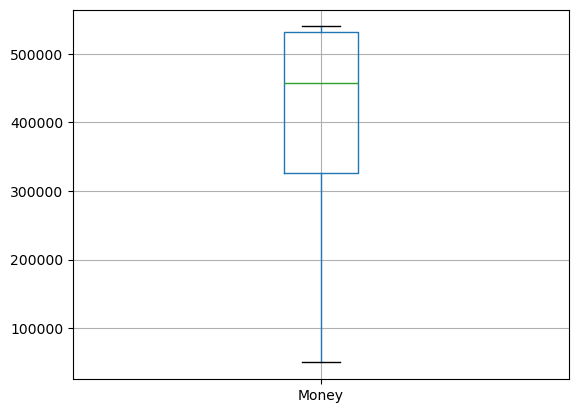

In [68]:
df.boxplot(column='Money')

<Axes: ylabel='Money'>

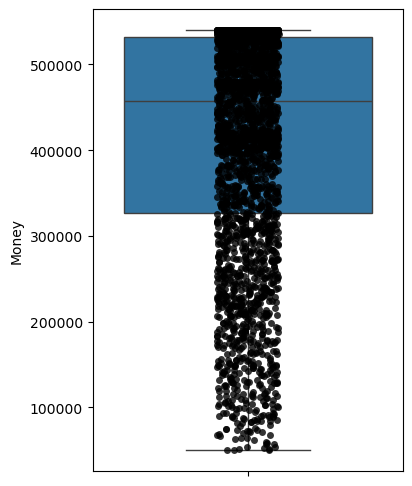

In [69]:
plt.figure(figsize=(4,6))


sns.boxplot(y = 'Money', data = df) 
sns.stripplot(y = 'Money', data = df,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### Proportion 400k

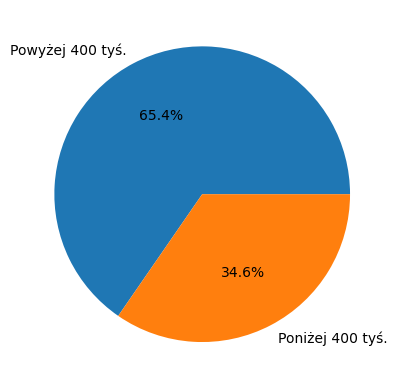

In [71]:
more400 = df['Money']>=400000
less400 = df['Money']<400000

fig, ax = plt.subplots()

ax.pie([more400.sum(), less400.sum()],
      labels=['Powyżej 400 tyś.', 'Poniżej 400 tyś.'],
      autopct='%1.1f%%')


plt.show()

### Wordcloud

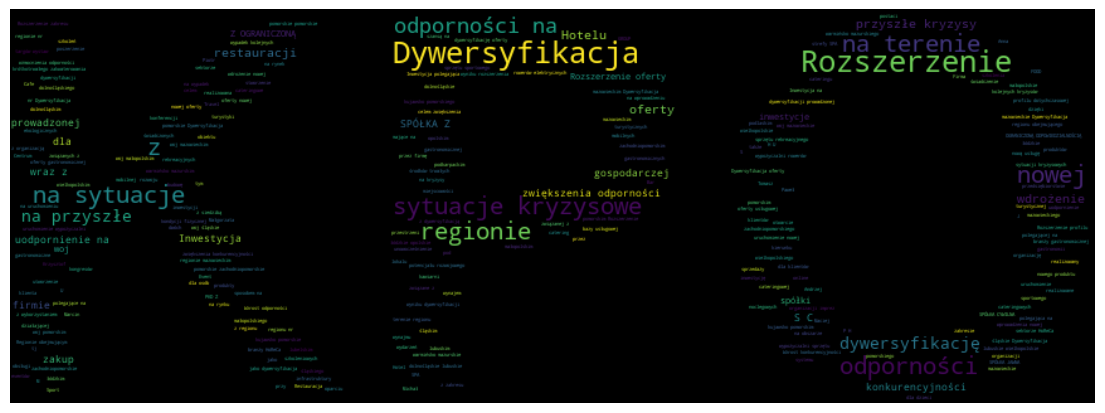

In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import re

# MASKA KPO
W, H = 1200, 600
img = Image.new("L", (W, H), 0)  # czarne tło
draw = ImageDraw.Draw(img)

try:
    font = ImageFont.truetype("arialbd.ttf", 420)  # Arial gruby
except:
    font = ImageFont.load_default()

text = "KPO"
bbox = draw.textbbox((0, 0), text, font=font)
x = (W - (bbox[2] - bbox[0])) // 2
y = (H - (bbox[3] - bbox[1])) // 2
draw.text((x, y), text, fill=255, font=font)  # białe litery na czarnym tle

mask_gray = np.array(img)

# BINARYZACJA
mask_bin = np.where(mask_gray > 0, 255, 0).astype(np.uint8)
mask_bin = 255 - mask_bin # odwrócenie maski

# Bounding box białych pikseli
ys, xs = np.where(mask_bin == 0)
min_x, max_x = xs.min(), xs.max()
min_y, max_y = ys.min(), ys.max()

# Przycięcie maski
mask_bin = mask_bin[min_y:max_y+1, min_x:max_x+1]

# Tekst z kolumny Investment
text_data = " ".join(df["Investment"].dropna().astype(str).tolist())
text_data = re.sub(r"[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ\s]", " ", text_data)

# Stopwords
polish_stops = {
    "projekt","realizacja","rozwój","modernizacja","wzmocnienie","działalności","działalność",
    "przedsiębiorstwa","przedsiębiorstwo","poprzez","nowych","nowe","usług","usługi","celu",
    "region","województwie","województwa","województwo","ramach","wprowadzenie","zwiększenie",
    "oraz", "Sp", "firmy", "W", "o"
}

stops = STOPWORDS.union(polish_stops)

wc = WordCloud(
    mask=mask_bin,
    background_color="black",
    colormap='viridis',
    max_words=800,
    stopwords=stops,
    prefer_horizontal=1.0,
    repeat=True,
    random_state=42
).generate(text_data)

plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


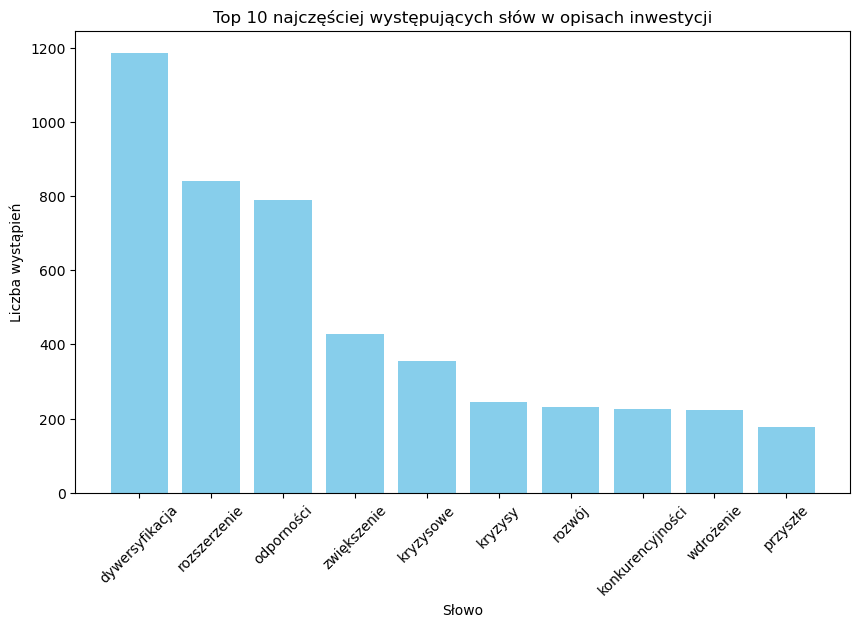

In [74]:
from collections import Counter
import matplotlib.pyplot as plt
import re

all_words = []

for text in df["Investment"].dropna().astype(str):
    words = re.findall(r"\w+", text.lower())
    all_words.extend(words)

word_counts = Counter(all_words)

stopwords = {"i", "na", "do", "oraz", "z", "w", "o", "dla", "od", "po", "u", "poprzez", "działalności", "usług", "firmy", "region", "usługi",
            "wprowadzenie", "województwie", "nowych", "oferty", "regionie", "nowej", "przedsiębiorstwa", "województwa", "sytuacje", 
             "województwo", "celu", "terenie", "prowadzonej", "dywersyfikację", "pomorskie"}  
filtered_counts = {word: count for word, count in word_counts.items() if word not in stopwords and len(word) > 3}

top10 = Counter(filtered_counts).most_common(10)

words, counts = zip(*top10)
plt.figure(figsize=(10,6))
plt.bar(words, counts, color="skyblue")
plt.title("Top 10 najczęściej występujących słów w opisach inwestycji")
plt.ylabel("Liczba wystąpień")
plt.xlabel("Słowo")
plt.xticks(rotation=45)
plt.show()


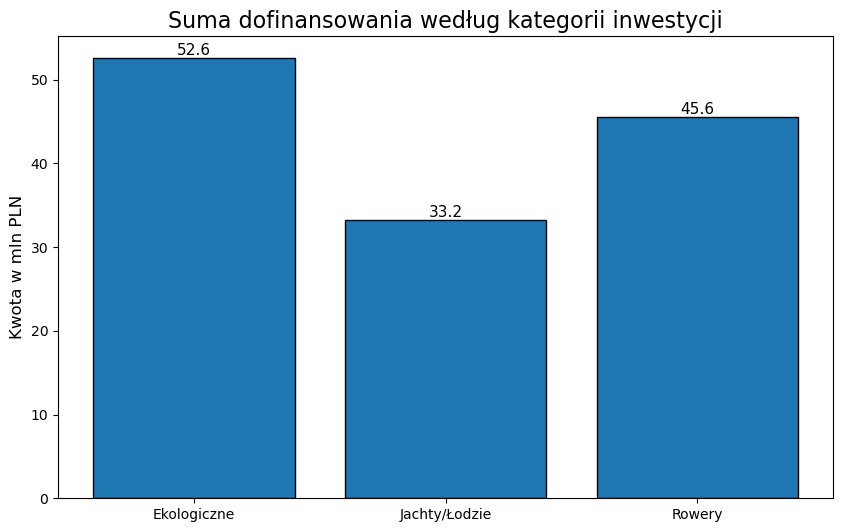

In [75]:
import matplotlib.pyplot as plt

categories = {
    "Ekologiczne": ["ekologi", "zeroemisyjn", "odnawialn", "fotowolt", "panel", "solarn"],
    "Jachty/Łodzie": ["jacht", "łodzi"],
    "Rowery": ["rower"],
}

category_sums = {cat: 0 for cat in categories}

for _, row in df.iterrows():
    investment_text = str(row["Investment"])
    amount = row["Money"]  # kolumna z kwotą
    for cat, keywords in categories.items():
        if any(keyword in investment_text for keyword in keywords):
            category_sums[cat] += amount

category_sums_mln = {k: v/1e6 for k,v in category_sums.items()}

plt.figure(figsize=(10,6))
bars = plt.bar(category_sums_mln.keys(), category_sums_mln.values(), color='#1f77b4', edgecolor='black')
plt.title("Suma dofinansowania według kategorii inwestycji", fontsize=16)
plt.ylabel("Kwota w mln PLN", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.1f}', ha='center', va='bottom', fontsize=11)

plt.show()


## Final charts

### Voivodeship

C:\Users\WIZBOX\AppData\Local\Temp\ipykernel_21764\820856728.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(money_voivodeship.index, rotation=30, ha='right')


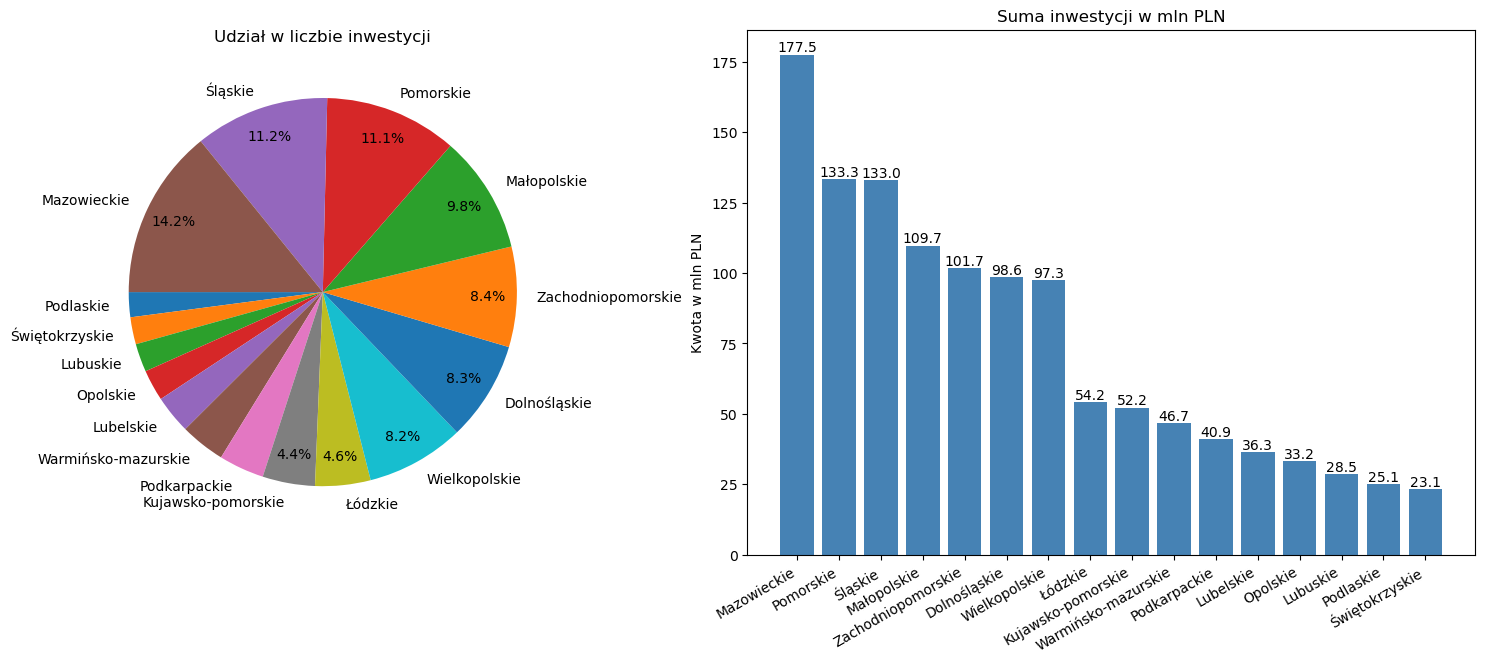

In [78]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 7),
    gridspec_kw={'width_ratios': [1, 1.5]}  # prawy wykres szerszy
)

# --- wykres kołowy ---
ax1.pie(
    count_voivodeship,
    labels=count_voivodeship.index,
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else "",
    startangle=180,
    pctdistance=0.85,
    labeldistance=1.1
)
ax1.set_title("Udział w liczbie inwestycji")

# --- wykres słupkowy ---
bars = ax2.bar(money_voivodeship.index, money_voivodeship.values/1e6, color='steelblue')
ax2.set_title("Suma inwestycji w mln PLN")
ax2.set_ylabel("Kwota w mln PLN")
ax2.set_xticklabels(money_voivodeship.index, rotation=30, ha='right')
ax2.bar_label(bars, fmt='%.1f')

# --- dostosowanie layoutu ---
plt.subplots_adjust(top=0.9, bottom=0.15, wspace=0.3)  # więcej miejsca dla X i margines od góry

plt.savefig("voivodeship.png", dpi=300, bbox_inches='tight')
plt.show()


### City

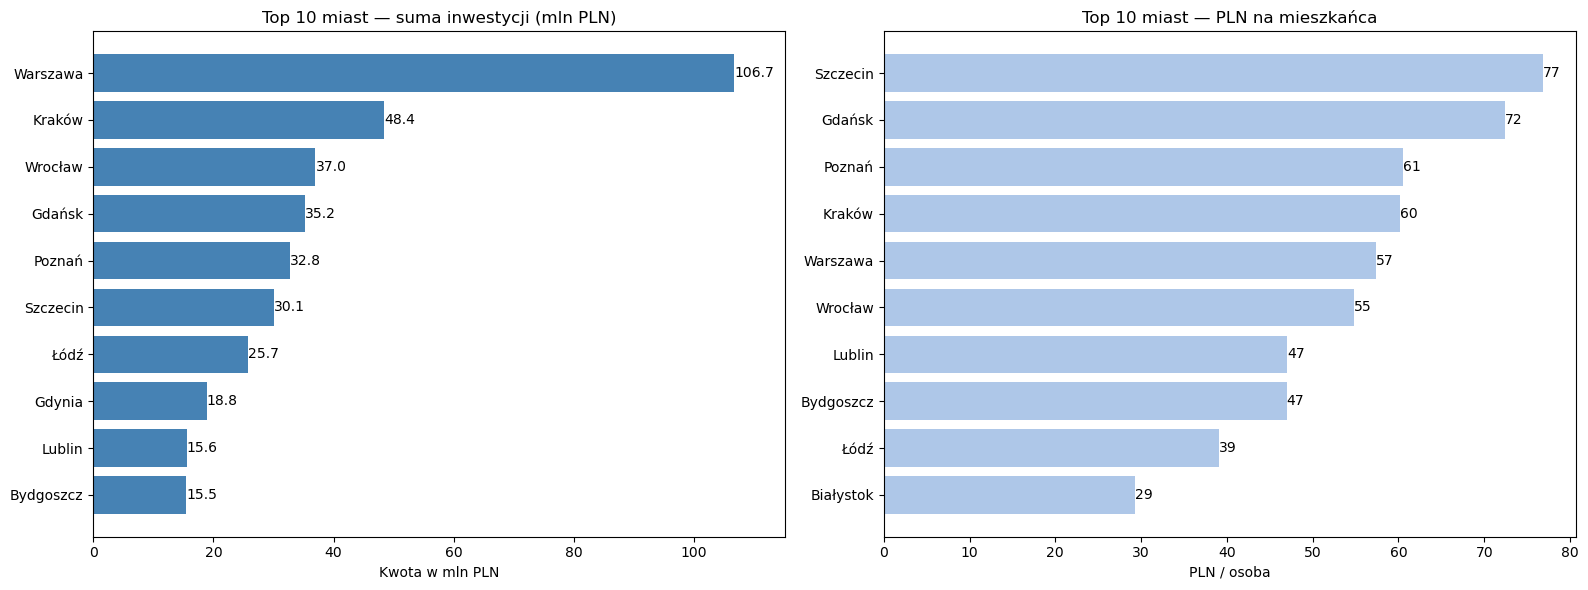

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

money_city = df.groupby('City')['Money'].sum().sort_values(ascending=False)
top10_money_city = money_city[:10]

city_pop = {
    "Warszawa": 1861975,
    "Kraków": 803283,
    "Łódź": 658444,
    "Wrocław": 675079,
    "Poznań": 541316,
    "Gdańsk": 486345,
    "Szczecin": 391566,
    "Bydgoszcz": 330038,
    "Lublin": 331243,
    "Białystok": 292600
}

city_per_capita = (money_city / pd.Series(city_pop)).dropna()
top10_per_capita = city_per_capita.sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

bars1 = ax1.barh(top10_money_city.index[::-1], (top10_money_city.values/1e6)[::-1], color='steelblue')
ax1.set_title("Top 10 miast — suma inwestycji (mln PLN)")
ax1.set_xlabel("Kwota w mln PLN")
ax1.bar_label(bars1, fmt='%.1f', label_type='edge')
ax1.set_xlim(0, max(top10_per_capita.values) * 1.5)

bars2 = ax2.barh(top10_per_capita.index[::-1], top10_per_capita.values[::-1], color='#aec7e8')
ax2.set_title("Top 10 miast — PLN na mieszkańca")
ax2.set_xlabel("PLN / osoba")
ax2.bar_label(bars2, fmt='%.0f', label_type='edge')

plt.tight_layout()
plt.savefig("city.png", dpi=300, bbox_inches='tight')

plt.show()


### Proportions

C:\Users\WIZBOX\AppData\Local\Temp\ipykernel_21764\1745410156.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


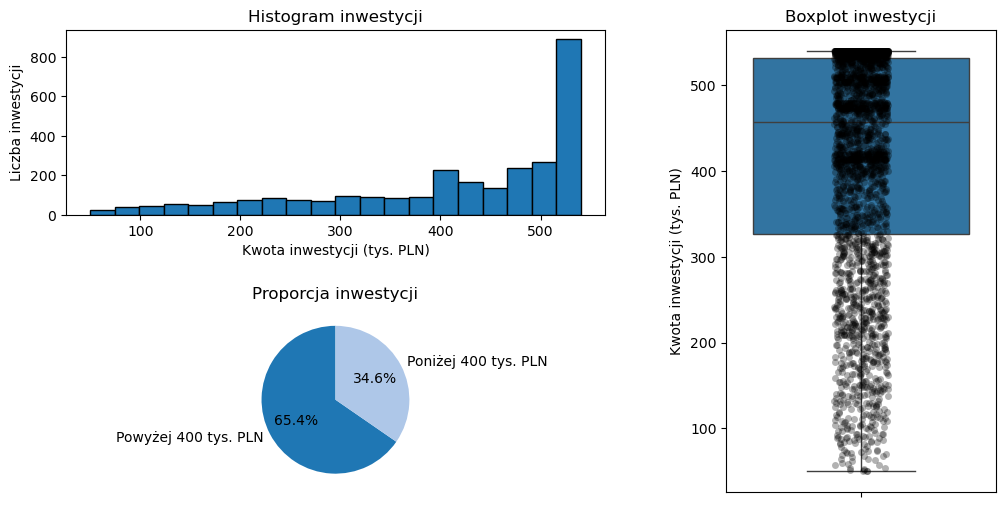

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(2, 2, width_ratios=[2,1], height_ratios=[1,1], hspace=0.5, wspace=0.3)

# Kolory
main_color = '#1f77b4'
light_color = '#aec7e8'

money_thousands = df['Money'] / 1000

# Histogram (lewy górny)
ax_hist = fig.add_subplot(gs[0,0])
ax_hist.hist(money_thousands, bins=20, color=main_color, edgecolor='black')
ax_hist.set_title("Histogram inwestycji")
ax_hist.set_xlabel("Kwota inwestycji (tys. PLN)")
ax_hist.set_ylabel("Liczba inwestycji")

# Wykres kołowy (lewy dolny)
ax_pie = fig.add_subplot(gs[1,0])
more400 = df['Money'] >= 400000
less400 = df['Money'] < 400000
ax_pie.pie([more400.sum(), less400.sum()],
           labels=['Powyżej 400 tys. PLN', 'Poniżej 400 tys. PLN'],
           autopct='%1.1f%%',
           colors=[main_color, light_color],
           startangle=90)
ax_pie.set_title("Proporcja inwestycji")

# Boxplot (prawa kolumna)
ax_box = fig.add_subplot(gs[:,1])
sns.boxplot(y=money_thousands, ax=ax_box, color=main_color)
sns.stripplot(y=money_thousands, ax=ax_box,
              jitter=True,
              marker='o',
              alpha=0.3,
              color='black')
ax_box.set_title("Boxplot inwestycji")
ax_box.set_ylabel("Kwota inwestycji (tys. PLN)")

plt.tight_layout()

plt.savefig("proportions.png", dpi=300, bbox_inches='tight')

plt.show()


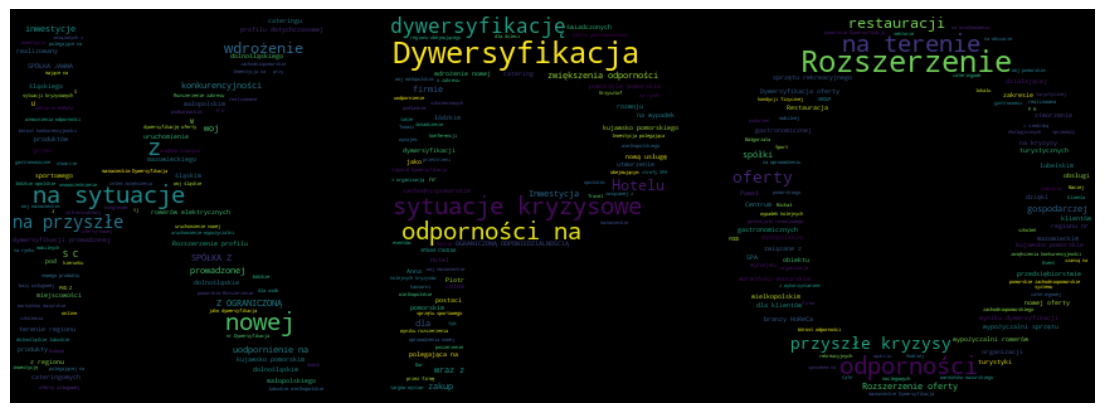

In [83]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import re

# MASKA KPO
W, H = 1200, 600
img = Image.new("L", (W, H), 0)  # czarne tło
draw = ImageDraw.Draw(img)

try:
    font = ImageFont.truetype("arialbd.ttf", 420)  # Arial gruby
except:
    font = ImageFont.load_default()

text = "KPO"
bbox = draw.textbbox((0, 0), text, font=font)
x = (W - (bbox[2] - bbox[0])) // 2
y = (H - (bbox[3] - bbox[1])) // 2
draw.text((x, y), text, fill=255, font=font)  # białe litery na czarnym tle

mask_gray = np.array(img)

# BINARYZACJA
mask_bin = np.where(mask_gray > 0, 255, 0).astype(np.uint8)
mask_bin = 255 - mask_bin # odwrócenie maski

# Bounding box białych pikseli
ys, xs = np.where(mask_bin == 0)
min_x, max_x = xs.min(), xs.max()
min_y, max_y = ys.min(), ys.max()

# Przycięcie maski
mask_bin = mask_bin[min_y:max_y+1, min_x:max_x+1]

# Tekst z kolumny Investment
text_data = " ".join(df["Investment"].dropna().astype(str).tolist())
text_data = re.sub(r"[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ\s]", " ", text_data)

# Stopwords
polish_stops = {
    "projekt","realizacja","rozwój","modernizacja","wzmocnienie","działalności","działalność",
    "przedsiębiorstwa","przedsiębiorstwo","poprzez","nowych","nowe","usług","usługi","celu",
    "region","województwie","województwa","województwo","ramach","wprowadzenie","zwiększenie",
    "oraz", "Sp", "firmy", "W", "o", "regionie"
}

stops = STOPWORDS.union(polish_stops)

wc = WordCloud(
    mask=mask_bin,
    background_color="black",
    colormap='viridis',
    max_words=800,
    stopwords=stops,
    prefer_horizontal=1.0,
    repeat=True,
    random_state=42
).generate(text_data)

plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("kpo.png", dpi=300, bbox_inches='tight')

plt.show()

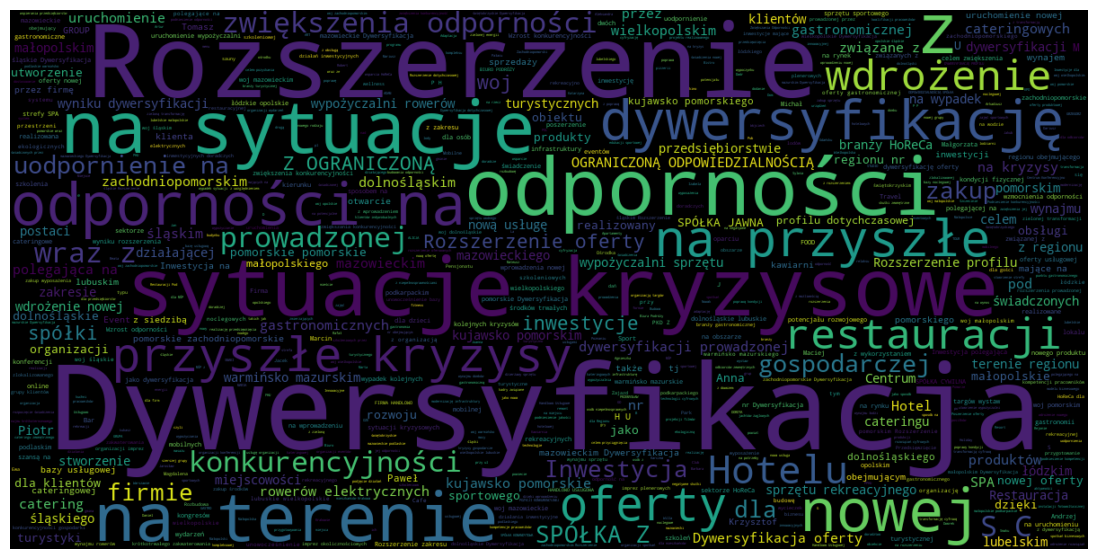

In [84]:
wc_plain = WordCloud(
    background_color="black",
    colormap='viridis',
    max_words=800,
    stopwords=stops,
    width=1200,
    height=600,
    prefer_horizontal=1.0,
    random_state=42
).generate(text_data)

plt.figure(figsize=(14,7))
plt.imshow(wc_plain, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()


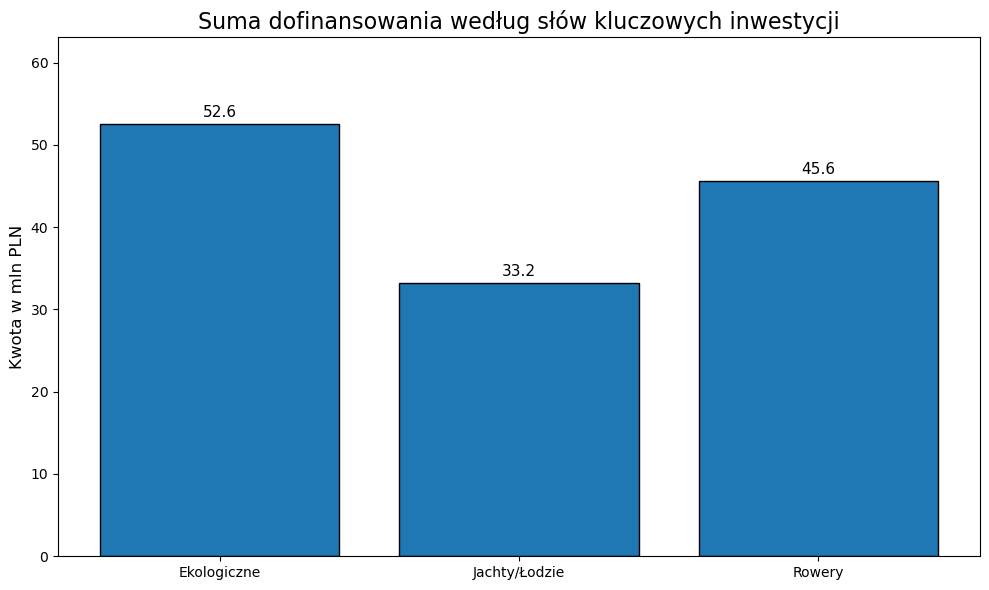

In [85]:
categories = {
    "Ekologiczne": ["ekologi", "zeroemisyjn", "odnawialn", "fotowolt", "panel", "solarn"],
    "Jachty/Łodzie": ["jacht", "łodzi"],
    "Rowery": ["rower"],
}

category_sums = {cat: 0 for cat in categories}
for _, row in df.iterrows():
    text = str(row["Investment"])
    amount = row["Money"]
    for cat, keywords in categories.items():
        if any(k in text for k in keywords):
            category_sums[cat] += amount

category_sums_mln = {k: v/1e6 for k,v in category_sums.items()}

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(category_sums_mln.keys(), category_sums_mln.values(),
              color='#1f77b4', edgecolor='black')

ax.bar_label(bars, fmt='%.1f', padding=3, fontsize=11)

ax.set_title("Suma dofinansowania według słów kluczowych inwestycji", fontsize=16)
ax.set_ylabel("Kwota w mln PLN", fontsize=12)
max_height = max(category_sums_mln.values())
ax.set_ylim(0, max_height * 1.2)  # 20% więcej miejsca nad najwyższym słupkiem

plt.tight_layout()
plt.savefig("cat.png", dpi=300, bbox_inches='tight')

plt.show()